# Accessibility Score

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import plotly.express as px
from shapely.geometry import Polygon

In [31]:
#loading dataframes
entrance_df = pd.read_json('entrance_score.json', orient='index')
centroid_df = pd.read_json('centroid_score.json', orient='index')
entrance_df

name     Einwohner    Alter_D  unter18_A     ab65_A   
0                   Alsenpark   9072.626025  38.776610  14.490263  12.280133  \
1    Alsterpark Klein Borstel  16405.127587  42.883331  17.225356  20.601010   
2               Alstervorland  19308.654830  43.763220  13.388264  20.745299   
3    Alter Botanischer Garten   1878.298928  39.834559  10.462172  13.310552   
4               Alter Elbpark   8853.092696  39.792623  11.069085  12.247264   
..                        ...           ...        ...        ...        ...   
113              Wehbers Park  12878.371442  39.316366  12.699704  12.198784   
114           Wesselhoeftpark   1307.841926  46.813732  17.254688  29.685362   
115                Westerpark   6346.673801  43.914671  20.399621  24.496555   
116  Wilhelmsburger Inselpark  16561.259892  40.068034  18.612115  18.199966   
117              Wohlers Park   9123.802748  37.703682  15.109093  10.180416   

     Auslaender_A  HHGroesse_D  Leerstandsquote  Wohnfl_Bew_D  Wohnfl_Whg_D   
0       18.304357     1.845922         0.987105     34.301941     61.099637  \
1        7.610585     2.024599         1.927127     42.887445     86.951816   
2       10.269647     1.744966         3.034436     42.497621     67.960304   
3       22.300744     1.661962         2.560311     37.518629     61.964251   
4       19.920892     1.675982         1.853271     36.458210     58.334004   
..            ...          ...              ...           ...           ...   
113     12.219869     1.718287         1.069639     37.733739     62.337495   
114      7.681149     2.159567         2.493287     50.820125     73.635379   
115      7.899101     2.299675         2.339698     49.203689     82.871328   
116     25.369864     2.265382         1.769146     27.423082     60.043686   
117     17.540858     1.867629         1.669557     34.593968     60.484302   

     census_blocks  size_ha  walk_dist  size_m2  park_pop_ratio   
0                5   1.6005        500    16005        1.764098  \
1               11  27.2419       1000   272419       16.605723   
2                8  13.7983       1000   137983        7.146174   
3                6   7.9442        500    79442       42.294652   
4                4   5.0377        500    50377        5.690328   
..             ...      ...        ...      ...             ...   
113              4   3.1201        500    31201        2.422744   
114              5   4.6759        500    46759       35.752792   
115             10  15.5176       1000   155176       24.449973   
116             13  45.3670       1000   453670       27.393447   
117              4   4.6891        500    46891        5.139414   

     acc_score_blocks  
0            0.352820  
1            1.509611  
2            0.893272  
3            7.049109  
4            1.422582  
..                ...  
113          0.605686  
114          7.150558  
115          2.444997  
116          2.107188  
117          1.284854  

[118 rows x 16 columns]

## Entrance Approach

In [32]:
entrance_acc_score = entrance_df["acc_score_blocks"]
entrance_age = entrance_df["Alter_D"]
entrance_u18 = entrance_df["unter18_A"]
entrance_o65 = entrance_df["ab65_A"]
entrance_immigrants = entrance_df["Auslaender_A"]
entrance_hh_persons = entrance_df["HHGroesse_D"]
entrance_vacancy_share = entrance_df["Leerstandsquote"]
entrance_flatsize_resident = entrance_df["Wohnfl_Bew_D"]
entrance_flatsize_flat = entrance_df["Wohnfl_Whg_D"]


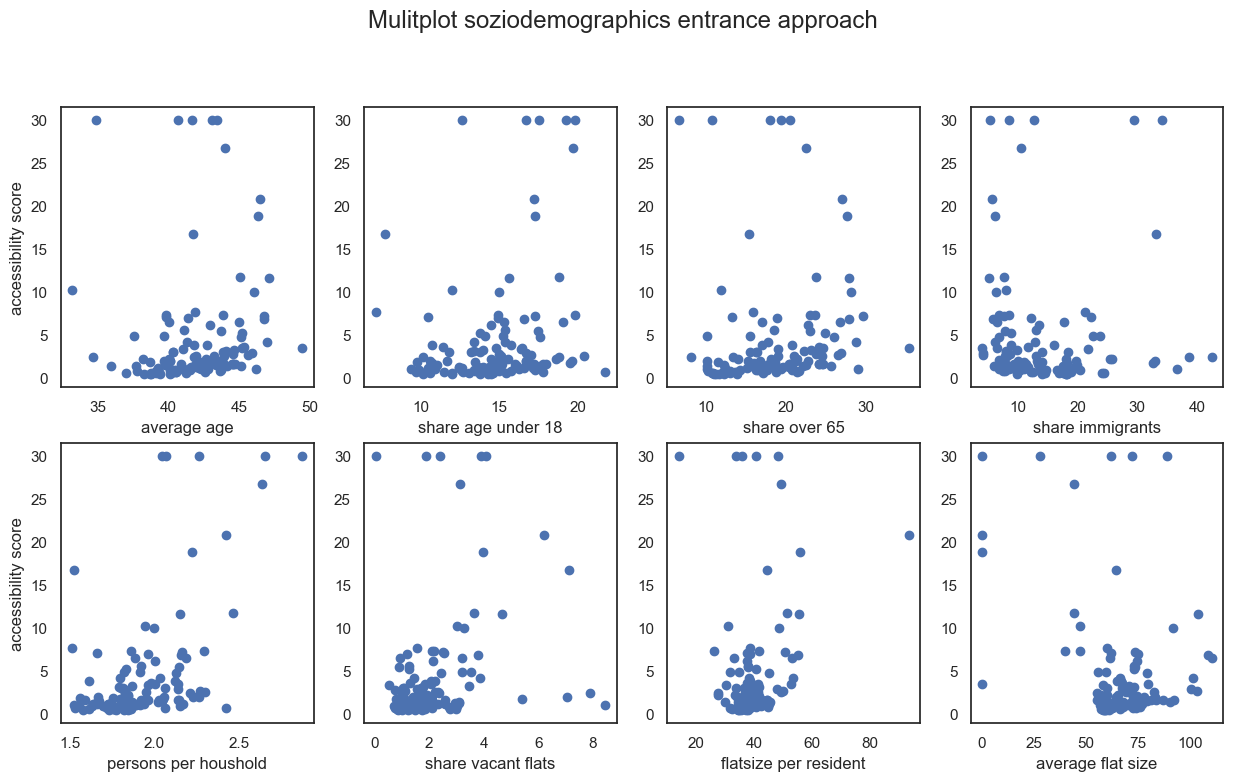

In [33]:
# plotting
fig, ax = plt.subplots(2, 4,figsize=(15, 8))
fig.suptitle("Mulitplot soziodemographics entrance approach", fontsize="x-large", ha = "center", va = "baseline")


ax[0, 0].scatter(entrance_age,entrance_acc_score)
ax[0, 0].set_ylabel('accessibility score')
ax[0, 0].set_xlabel('average age')

ax[0, 1].scatter(entrance_u18,entrance_acc_score)
#ax[0, 1].set_ylabel('accessibility score')
ax[0, 1].set_xlabel('share age under 18')

ax[0, 2].scatter(entrance_o65,entrance_acc_score)
#ax[0, 2].set_ylabel('accessibility score')
ax[0, 2].set_xlabel('share over 65')

ax[0, 3].scatter(entrance_immigrants,entrance_acc_score)
#ax[0, 3].set_ylabel('accessibility score')
ax[0, 3].set_xlabel('share immigrants')

ax[1, 0].scatter(entrance_hh_persons,entrance_acc_score)
ax[1, 0].set_ylabel('accessibility score')
ax[1, 0].set_xlabel('persons per houshold')

ax[1, 1].scatter(entrance_vacancy_share,entrance_acc_score)
#ax[1, 1].set_ylabel('accessibility score')
ax[1, 1].set_xlabel('share vacant flats')

ax[1, 2].scatter(entrance_flatsize_resident,entrance_acc_score)
#ax[1, 2].set_ylabel('accessibility score')
ax[1, 2].set_xlabel('flatsize per resident')

ax[1, 3].scatter(entrance_flatsize_flat,entrance_acc_score)
#ax[1, 3].set_ylabel('accessibility score')
ax[1, 3].set_xlabel('average flat size')

plt.show()

In [34]:
entrance_corr_df = entrance_df.copy()
entrance_corr_df = entrance_corr_df.drop(columns= ["name", "Einwohner","size_ha","census_blocks","size_m2","walk_dist"])

In [35]:
entrance_corr = entrance_corr_df.corr()

## Centroid Approach

In [36]:
centroid_corr_df = centroid_df.copy()
centroid_corr_df = centroid_corr_df.drop(columns= ["name", "Einwohner","size_ha","census_blocks","size_m2","walk_dist"])

In [37]:
centroid_corr = centroid_corr_df.corr()

## Plotting the correlation matrix

Text(0.5, 1.0, 'Correlation Heatmap Entrance Approach')

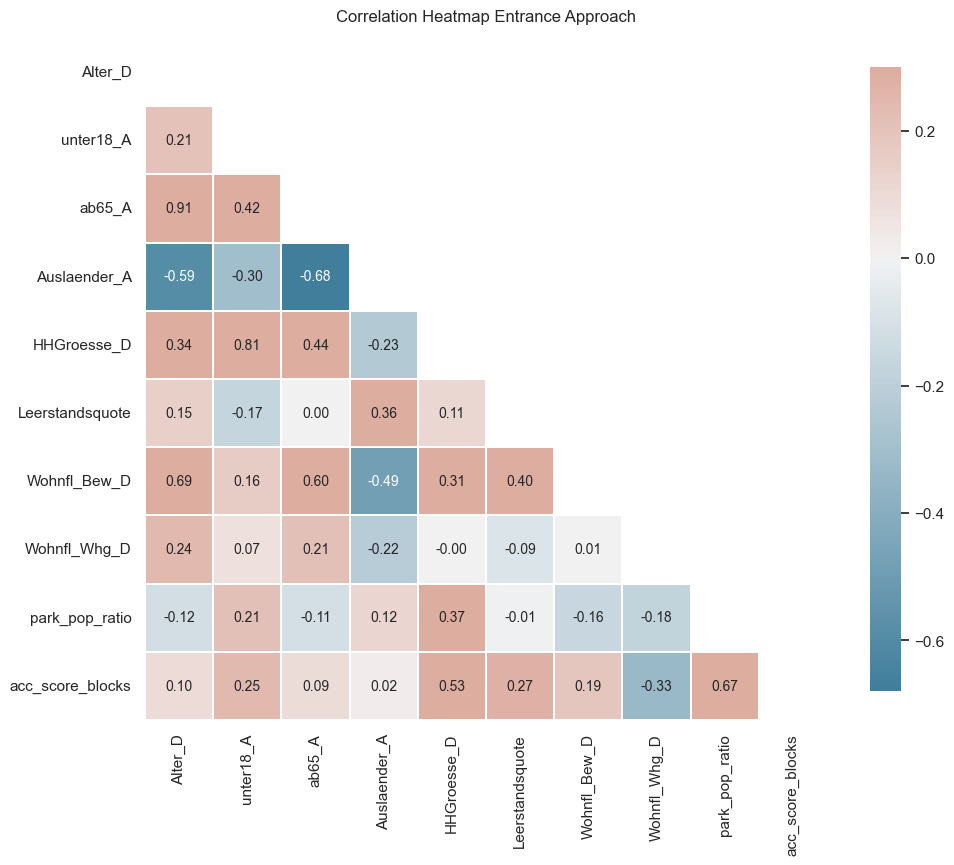

In [38]:
# entrance correlation matrix
sns.set_theme(style="white")
mask = np.triu(np.ones_like(entrance_corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

heatmap = sns.heatmap(entrance_corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True, fmt='.2f', annot_kws={"size": 10},
            square=True, linewidths=.3, cbar_kws={"shrink": .9})
heatmap.set_title('Correlation Heatmap Entrance Approach', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap Centroid Approach')

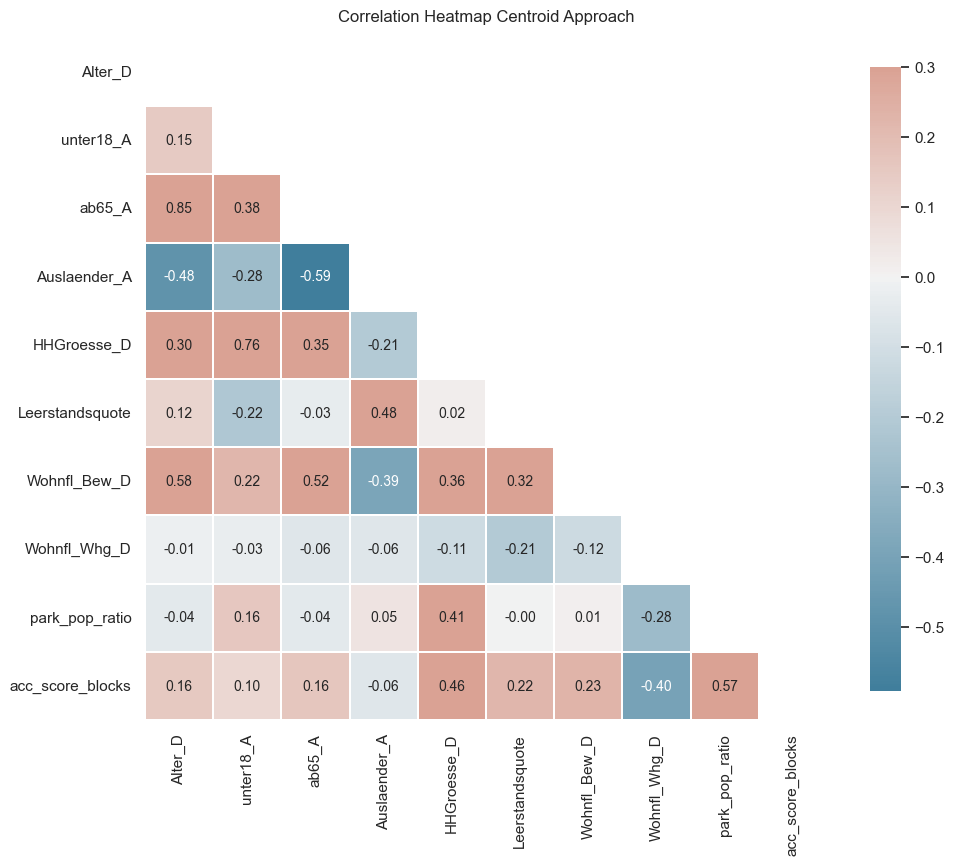

In [39]:
# centroid correlation matrix
sns.set_theme(style="white")
mask = np.triu(np.ones_like(centroid_corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(centroid_corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True, fmt='.2f', annot_kws={"size": 10},
            square=True, linewidths=.3, cbar_kws={"shrink": .9})
heatmap.set_title('Correlation Heatmap Centroid Approach', fontdict={'fontsize':12}, pad=12)

## Summary

In [40]:
pop_entrance = entrance_df["Einwohner"].sum()
pop_centroid = centroid_df["Einwohner"].sum()
centroid_corr_score = centroid_corr_df.corr()[["acc_score_blocks"]]
entrance_corr_score = entrance_corr_df.corr()[["acc_score_blocks"]]
entrance_corr_score = entrance_corr_score.rename({"acc_score_blocks": "entrance_approach"}, axis = 'columns')
centroid_corr_score = centroid_corr_score.rename({"acc_score_blocks": "centroid_approach"}, axis = 'columns')

summary = centroid_corr_score.join(entrance_corr_score)
print("Summary walking distance based on park size")
print("_____________________________________________")
print(f"Population Centroid Approach: {pop_centroid}")
print(f"Population Entrance Approach: {pop_entrance}")
summary

Summary walking distance based on park size
_____________________________________________
Population Centroid Approach: 356792.1933355303
Population Entrance Approach: 800825.1144676993


centroid_approach  entrance_approach
Alter_D                    0.157154           0.100627
unter18_A                  0.097487           0.245354
ab65_A                     0.162752           0.089680
Auslaender_A              -0.055704           0.024442
HHGroesse_D                0.458018           0.534026
Leerstandsquote            0.221516           0.274854
Wohnfl_Bew_D               0.231119           0.186750
Wohnfl_Whg_D              -0.404009          -0.330740
park_pop_ratio             0.566810           0.674057
acc_score_blocks           1.000000           1.000000

## 500m walking distance for all

In [41]:
#loading dataframes
entrance_500_df = pd.read_json('entrance_500_score.json', orient='index')
centroid_500_df = pd.read_json('centroid_500_score.json', orient='index')
entrance_500_df

name     Einwohner    Alter_D  unter18_A     ab65_A   
0                   Alsenpark   9072.626025  38.776610  14.490263  12.280133  \
1    Alsterpark Klein Borstel   6026.504194  42.474464  18.462703  20.262736   
2               Alstervorland   6247.377232  44.973024  12.580835  22.358921   
3    Alter Botanischer Garten   1878.313169  39.834621  10.462073  13.310635   
4               Alter Elbpark   9109.480809  39.762051  11.088312  12.206716   
..                        ...           ...        ...        ...        ...   
113              Wehbers Park  12878.371442  39.316366  12.699704  12.198784   
114           Wesselhoeftpark   1307.841926  46.813732  17.254688  29.685362   
115                Westerpark   2345.235726  44.260129  20.641829  25.964137   
116  Wilhelmsburger Inselpark   7257.563755  40.652625  18.140805  18.972597   
117              Wohlers Park   9154.353857  37.702121  15.109981  10.177650   

     Auslaender_A  HHGroesse_D  Leerstandsquote  Wohnfl_Bew_D  Wohnfl_Whg_D   
0       18.304357     1.845922         0.987105     34.301941     61.099637  \
1        6.808977     2.074803         2.040805     43.643454     90.931212   
2       10.373064     1.728422         3.402602     42.458974     67.956450   
3       22.300698     1.661957         2.560280     37.518677     61.964281   
4       19.903076     1.677313         1.851163     36.447384     58.348299   
..            ...          ...              ...           ...           ...   
113     12.219869     1.718287         1.069639     37.733739     62.337495   
114      7.681149     2.159567         2.493287     50.820125     73.635379   
115      8.017461     2.297658         2.307766     53.037676      0.000000   
116     24.384096     2.241496         1.578864     30.572419     65.920633   
117     17.540707     1.867674         1.670406     34.591780     60.489887   

     census_blocks  size_ha  size_m2  park_pop_ratio  acc_score_blocks  
0                5   1.6005    16005        1.764098          0.352820  
1                8  27.2419   272419       45.203486          5.650436  
2                8  13.7983   137983       22.086548          2.760819  
3                6   7.9442    79442       42.294332          7.049055  
4                4   5.0377    50377        5.530172          1.382543  
..             ...      ...      ...             ...               ...  
113              4   3.1201    31201        2.422744          0.605686  
114              5   4.6759    46759       35.752792          7.150558  
115              6  15.5176   155176       66.166483         11.027747  
116              8  45.3670   453670       62.509957          7.813745  
117              4   4.6891    46891        5.122262          1.280566  

[118 rows x 15 columns]

### Entrance Approach

In [42]:
entrance_500_corr_df = entrance_500_df.copy()
entrance_500_corr_df = entrance_500_corr_df.drop(columns= ["name", "Einwohner","size_ha","census_blocks","size_m2"])

In [43]:
entrance_500_corr = entrance_500_corr_df.corr()

Text(0.5, 1.0, 'Correlation Heatmap Entrance 500m Approach')

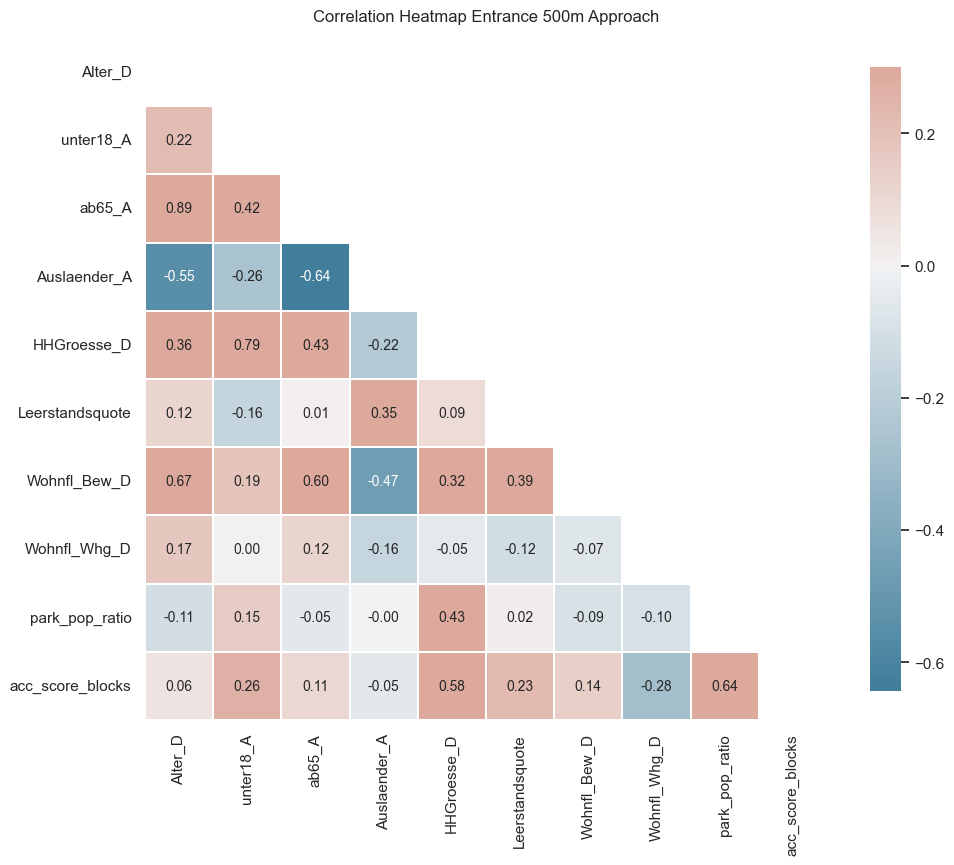

In [44]:
# entrance correlation matrix
sns.set_theme(style="white")
mask = np.triu(np.ones_like(entrance_500_corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(entrance_500_corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True, fmt='.2f', annot_kws={"size": 10},
            square=True, linewidths=.3, cbar_kws={"shrink": .9})
heatmap.set_title('Correlation Heatmap Entrance 500m Approach', fontdict={'fontsize':12}, pad=12)

### Centroid Correlation

In [45]:
centroid_500_corr_df = centroid_500_df.copy()
centroid_500_corr_df = centroid_500_corr_df.drop(columns= ["name", "Einwohner","size_ha","census_blocks","size_m2"])

In [46]:
centroid_500_corr = centroid_500_corr_df.corr()

Text(0.5, 1.0, 'Correlation Heatmap Centroid 500m Approach')

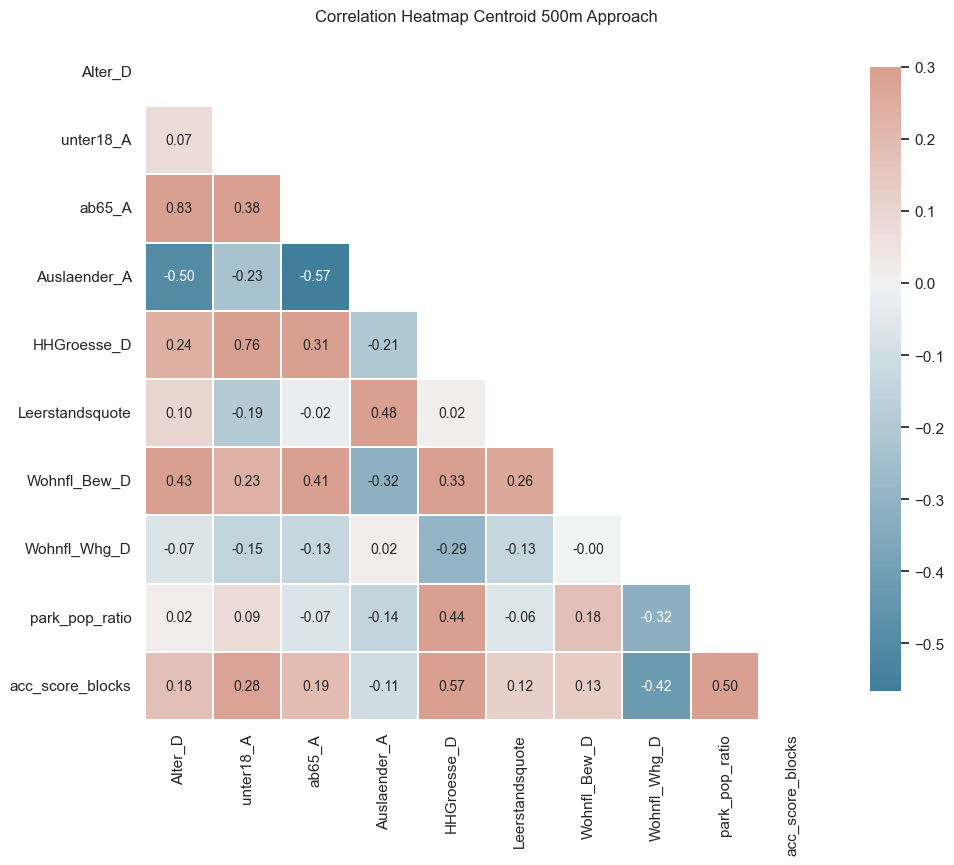

In [47]:
# centroid correlation matrix
sns.set_theme(style="white")
mask = np.triu(np.ones_like(centroid_500_corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(centroid_500_corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True, fmt='.2f', annot_kws={"size": 10},
            square=True, linewidths=.3, cbar_kws={"shrink": .9})
heatmap.set_title('Correlation Heatmap Centroid 500m Approach', fontdict={'fontsize':12}, pad=12)

## Summary 500m for all

In [48]:
pop_entrance_500 = entrance_500_df["Einwohner"].sum()
pop_centroid_500 = centroid_500_df["Einwohner"].sum()
centroid_500_corr_score = centroid_500_corr_df.corr()[["acc_score_blocks"]]
entrance_500_corr_score = entrance_500_corr_df.corr()[["acc_score_blocks"]]
entrance_500_corr_score = entrance_500_corr_score.rename({"acc_score_blocks": "entrance_approach"}, axis = 'columns')
centroid_500_corr_score = centroid_500_corr_score.rename({"acc_score_blocks": "centroid_approach"}, axis = 'columns')

summary_500 = centroid_500_corr_score.join(entrance_500_corr_score)
print("Summary 500m walking distance for all")
print("_____________________________________________")
print(f"Population Centroid Approach: {pop_centroid_500}")
print(f"Population Entrance Approach: {pop_entrance_500}")
summary_500

Summary 500m walking distance for all
_____________________________________________
Population Centroid Approach: 245409.391993026
Population Entrance Approach: 581778.4359629829


centroid_approach  entrance_approach
Alter_D                    0.178265           0.058356
unter18_A                  0.283386           0.263289
ab65_A                     0.193729           0.107585
Auslaender_A              -0.109072          -0.051757
HHGroesse_D                0.568191           0.577157
Leerstandsquote            0.117832           0.230164
Wohnfl_Bew_D               0.134743           0.139562
Wohnfl_Whg_D              -0.424705          -0.282826
park_pop_ratio             0.503702           0.637073
acc_score_blocks           1.000000           1.000000

## Map Definitions

In [49]:
def map_one_park_polygons(park_df,park_name,census):
    park = park_df[park_df.name == park_name]
    map = folium.Map(location=[53.41535, 9.90225], tiles="CartoDB Positron", zoom_start=11, control_scale = True)
    for _, r in census.iterrows():
        sim_geo_ = gpd.GeoSeries(r["geometry"])
        geo_j_ = sim_geo_.to_json()
        geo_j_ = folium.GeoJson(data=geo_j_, style_function=lambda x: {"fillColor": "orange"})
        folium.Popup(r["row_number"]).add_to(geo_j_)
        geo_j_.add_to(map)
    for _, r in park.iterrows():
        sim_geo = gpd.GeoSeries(r["geometry"])
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "green"})
        if 'name' in park.columns:
            folium.Popup(r["name"]).add_to(geo_j)
        geo_j.add_to(map)
    
    return map

In [50]:
def map_multiple_polygons(park,census):
    map = folium.Map(location=[53.41535, 9.90225], tiles="CartoDB Positron", zoom_start=11, control_scale = True)
    for _, r in census.iterrows():
        sim_geo_ = gpd.GeoSeries(r["geometry"])
        geo_j_ = sim_geo_.to_json()
        geo_j_ = folium.GeoJson(data=geo_j_, style_function=lambda x: {"fillColor": "orange"})
        if 'row_number' in census.columns:
            folium.Popup(r["row_number"]).add_to(geo_j_)
        geo_j_.add_to(map)
    for _, r in park.iterrows():
        sim_geo = gpd.GeoSeries(r["geometry"])
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "green"})
        if 'name' in park.columns:
            folium.Popup(r["name"]).add_to(geo_j)
        geo_j.add_to(map)
    
    return map

In [316]:
def map_catchment_heatmap(park, catchment_area, park_name, census, sociodemographics):
    map = folium.Map(location=[53.554831, 10.000305], tiles="CartoDB Positron", zoom_start=11, control_scale = False)
    
    # buffering arround park catchment area to get nearest census blocks
    catchment_park_df = catchment_area[catchment_area["name"] == park_name].reset_index()
    park_3395 = catchment_park_df.to_crs(epsg=3395)
    bbox_park = park_3395.buffer(1720,cap_style = 1)

    # convert buffered polygon back to 4326 crs
    envgdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(bbox_park))
    bbox_4326 = gpd.GeoDataFrame(envgdf, crs='EPSG:3395')
    bbox_4326 = bbox_4326.to_crs(epsg=4326)
    bbox_4326["name"] = catchment_park_df["name"]
    bbox_4326

    # find subset of census blocks intersecting with buffered catchment area
    intersecting_blocks = gpd.sjoin(census,bbox_4326,how = "inner", predicate="intersects")

    # convert census df to GeoJSON
    census_gjson = intersecting_blocks.to_json()

    # create choropleth and add to map
    folium.Choropleth(
        geo_data = census_gjson,
        name="choropleth",
        data=intersecting_blocks,
        columns =["row_number", sociodemographics],
        key_on = "feature.properties.row_number",
        fill_color="YlOrBr",
        fill_opacity=0.8,
        line_opacity=0.6,
        legend_name="Average Age"
    ).add_to(map)
    
    sozio = folium.features.GeoJson(
    intersecting_blocks, 
    control=False,
    tooltip=folium.features.GeoJsonTooltip(
        fields=[sociodemographics],
        aliases=[sociodemographics]
        ))
    
    # adding catchment area,reduced by park area to map
    park_area = park[park["name"] == park_name].reset_index()
    difference = catchment_park_df["geometry"].difference(park_area["geometry"])
    difference = folium.GeoJson(data=difference, style_function=lambda x: {"fillColor": "green","fillOpacity": 0.9, "color": "green", "stroke":True,"weight":0.5})
    
    difference.add_to(map)
    
    #map.add_child(sozio)
    map.keep_in_front(difference)
    return map

## Visualization Raster Resolution

In [109]:
census_bbox = gpd.read_file('../get_population_data/census_final_data.json',driver= 'GeoJSON')
park_catchment_areas = gpd.read_file('../get_isodistances/isodistances_entrance_park_coordinates.json',driver= 'GeoJSON')
park_areas = gpd.read_file('../get_park_data/data.json',driver= 'GeoJSON')
park_areas

name   
0                   Alsenpark  \
1    Alsterpark Klein Borstel   
2               Alstervorland   
3    Alter Botanischer Garten   
4               Alter Elbpark   
..                        ...   
118           Wesselhoeftpark   
119                Westerpark   
120  Wilhelmsburger Inselpark   
121              Wohlers Park   
122          oejendorfer Park   

                                              geometry  
0    MULTIPOLYGON (((9.94658 53.56546, 9.94651 53.5...  
1    MULTIPOLYGON (((10.02926 53.62631, 10.02915 53...  
2    MULTIPOLYGON (((10.00106 53.57307, 10.00103 53...  
3    POLYGON ((9.98821 53.56079, 9.98915 53.56009, ...  
4    MULTIPOLYGON (((9.97090 53.54780, 9.97091 53.5...  
..                                                 ...  
118  POLYGON ((9.85850 53.55248, 9.85921 53.55174, ...  
119  MULTIPOLYGON (((9.85730 53.55259, 9.85730 53.5...  
120  MULTIPOLYGON (((9.99554 53.49152, 9.99554 53.4...  
121  POLYGON ((9.95193 53.55888, 9.95197 53.55891, ...  
122  MULTIPOLYGON (((10.13732 53.55260, 10.13727 53...  

[123 rows x 2 columns]

In [53]:
map_one_park_polygons(park_catchment_areas,"Berner Gutspark",census_bbox)

In [77]:
berner_gutspark = park_catchment_areas[park_catchment_areas["name"] == "Berner Gutspark"]

In [78]:
berner_gutspark

name                                           geometry
15  Berner Gutspark  POLYGON ((10.13741 53.62463, 10.13724 53.62435...

In [160]:
berner_gutspark_3395 = berner_gutspark.to_crs(epsg=3395)
bbox_park = berner_gutspark_3395.buffer(1720, cap_style=1)
bbox_park
#berner_gutspark["geometry"] = bbox_park
#berner_gutspark

15    POLYGON ((1128379.685 7062682.006, 1128288.459...
dtype: geometry

In [161]:
envgdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(bbox_park))
bbox_4326 = gpd.GeoDataFrame(envgdf, crs='EPSG:3395')
bbox_4326 = bbox_4326.to_crs(epsg=4326)
bbox_4326["name"] = berner_gutspark["name"]
bbox_4326

geometry             name
15  POLYGON ((10.13641 53.61248, 10.13559 53.61227...  Berner Gutspark

In [162]:
map_one_park_polygons(bbox_4326,"Berner Gutspark",census_bbox)

In [164]:
intersecting_blocks = gpd.sjoin(census_bbox,bbox_4326,how = "inner", predicate="intersects")

<AxesSubplot: >

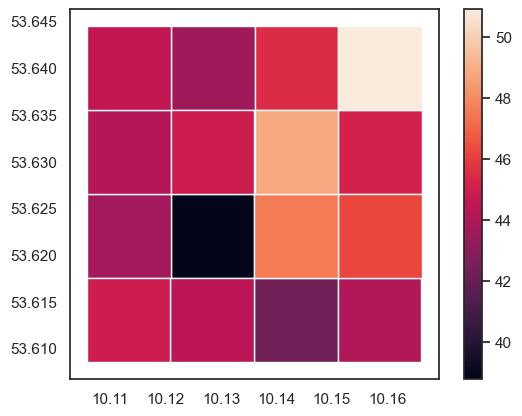

In [165]:
intersecting_blocks.plot(column= "Alter_D", legend = True)

<AxesSubplot: >

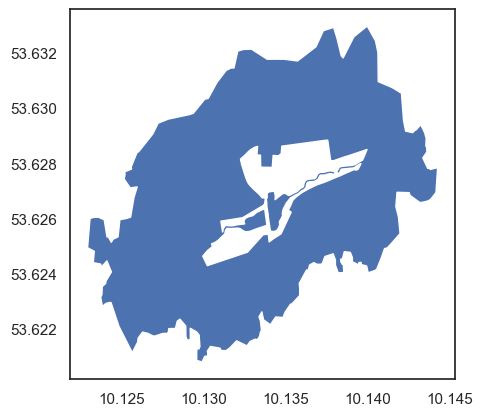

In [290]:
park_test = park_areas[park_areas["name"] == "Berner Gutspark"].reset_index()
catchment_test = park_catchment_areas[park_catchment_areas["name"] == "Berner Gutspark"].reset_index()


difference = catchment_test["geometry"].difference(park_test["geometry"])
difference.plot()


## Correlation per park size categories